## Stroke Prediction

### <ins>1. Objective</ins>
#### Stroke is the 2nd leading cause of death globally, accounting for 11% of total deaths worldwide according to the World Health Organization (WHO).
#### The ability to predict the likehood of a patient to get stroke based on the various health and patient demographics, like gender, age, various diseases, and smoking status, may faciliate preventative medical interventions to save lives.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### <ins>2. Data</ins>
#### Data is from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

#### Data consists of
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(df.head())
df = df.set_index('id')

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
print('Number of patients: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of patients:  5110
Number of columns:  11


#### Cleaning data by removing duplicates.

In [4]:
print('Duplicated observation ', df[df.duplicated()])
df = df.drop_duplicates()
print('New number of patients: ', df.shape[0])

Duplicated observation  Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
New number of patients:  5110


#### Information on data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Feature Engineering: Imputation
#### BMI is body mass index, weight/height^2, and is a typical indicator of obesity and general health. As such, BMI could contribute strongly to risk of stroke.
#### Explore to identify any trends in age and gender for those null BMI to aid in imputation.

<Figure size 432x288 with 0 Axes>

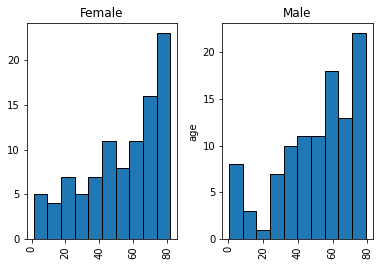

In [8]:
df_bmi_null = df[df['bmi'].isnull() == True]
plt.figure();
df_bmi_null.hist(by='gender', column=['age'], grid=False, edgecolor = "black");
plt.ylabel('age');

In [9]:
print('Statistics of null BMI by Female gender')
print(df_bmi_null[df_bmi_null['gender'] == 'Female']['age'].describe())

print('Statistics of null BMI by Male gender')
print(df_bmi_null[df_bmi_null['gender'] == 'Male']['age'].describe())

Statistics of null BMI by Female gender
count    97.000000
mean     53.302268
std      22.519195
min       1.320000
25%      38.000000
50%      60.000000
75%      73.000000
max      82.000000
Name: age, dtype: float64
Statistics of null BMI by Male gender
count    104.000000
mean      50.880385
std       22.091668
min        0.480000
25%       35.000000
50%       57.500000
75%       70.250000
max       79.000000
Name: age, dtype: float64


#### Wide range in age span for both genders with null BMI values.
#### [Given BMI varies substantially by age](https://www.cdc.gov/nccdphp/dnpa/growthcharts/training/modules/module1/text/module1print.pdf), need to calculate the median BMI for each age group for imputation of BMI. Add new column to classify each patient by their age group and impute the null BMI with their respective medians.
#### [Age groups](https://www.statcan.gc.ca/en/concepts/definitions/age2):
* less than 14 years, children
* 15 to 24, youth
* 25 to 64, adults
* greater than 65, seniors


In [10]:
# Function to define age group based on age, returns age group name
def define_age_group(age):
    if age <= 14:
        return 'child'
    elif age > 14 and age <=24:
        return 'youth'
    elif age > 24 and age <=64:
        return 'adult'
    elif age > 64:
        return 'senior'

In [11]:
# apply function to add age_group definition
df['age_group'] = df.apply(lambda x: define_age_group(x['age']), axis=1)

In [12]:
# calculate median bmi based on age group
median_bmi_age_group = df[['bmi', 'gender', 'age_group']].groupby(['age_group', 'gender'])['bmi'].median().reset_index()  # median() ignores NaN by default.

In [13]:
# Function to impute median based on age group for null bmi
def impute_bmi(age_group_x, gender_x, bmi_x):
    if pd.isnull(bmi_x):
        return median_bmi_age_group.query('age_group == @age_group_x & gender == @gender_x')['bmi'].values[0]
    else:
        return bmi_x

In [14]:
# apply function to add age_group definition
df['bmi'] = df.apply(lambda x: impute_bmi(x['age_group'], x['gender'], x['bmi']), axis=1)

# confirm no nulls in bmi
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

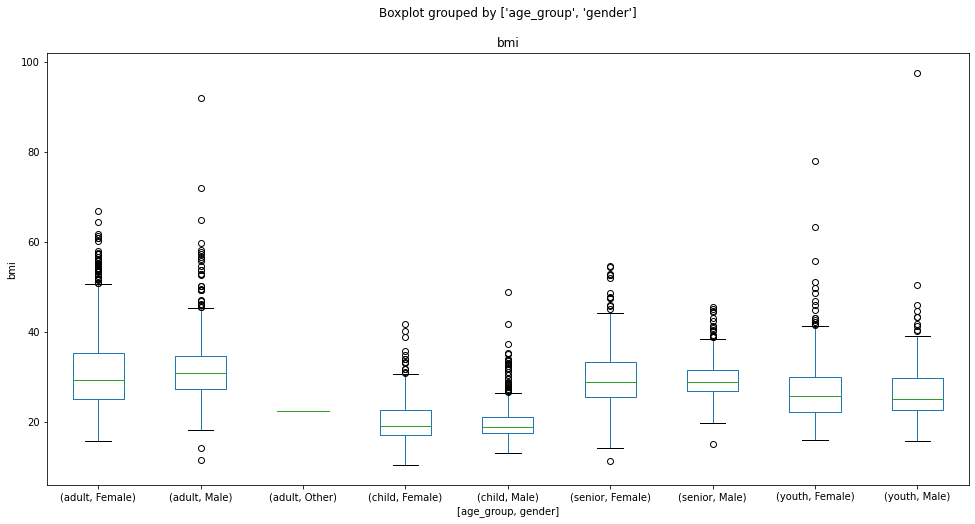

In [15]:
# distribution of bmi by age group and gender
df.boxplot(by=['age_group', 'gender'], column=['bmi'], grid=False, figsize=(16,8));
plt.ylabel('bmi');

#### Drop 'Other' gender as only 1 data point

In [16]:
print(df['gender'].value_counts())
df = df[df['gender'] != 'Other']
print(df['gender'].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Female    2994
Male      2115
Name: gender, dtype: int64


#### Summary statistics of data.

In [17]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.877471,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.723424,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.300000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Distribution of no stroke = 0 and stroke = 1 data.
Imbalanced target classes, more non-stroke than stroke.

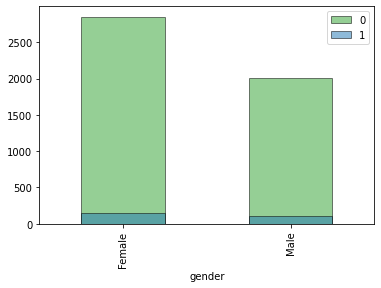

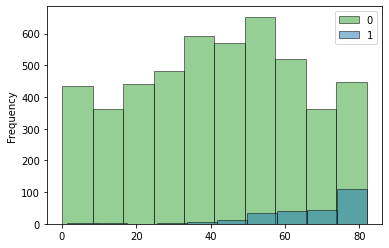

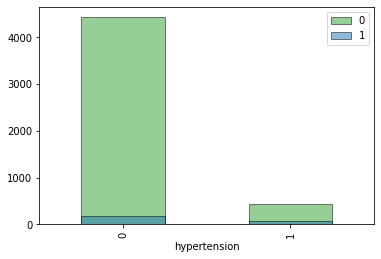

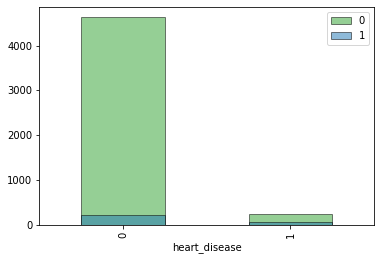

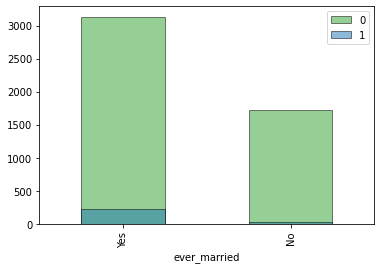

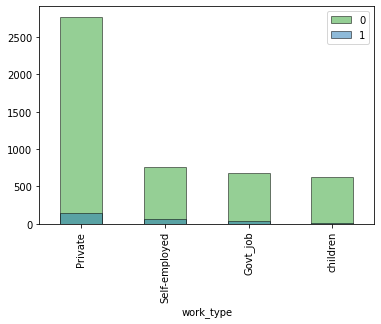

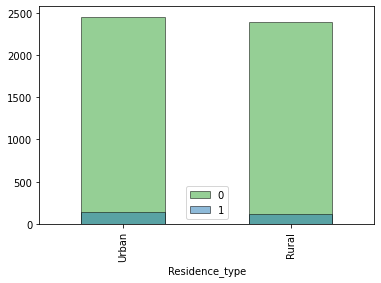

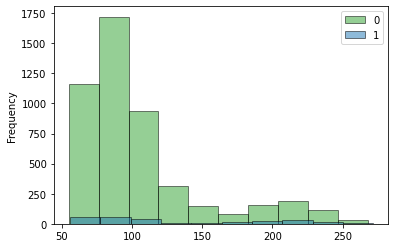

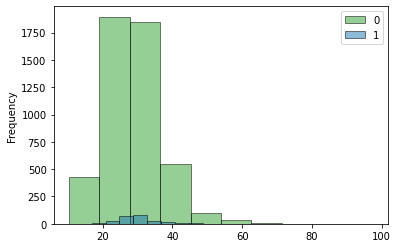

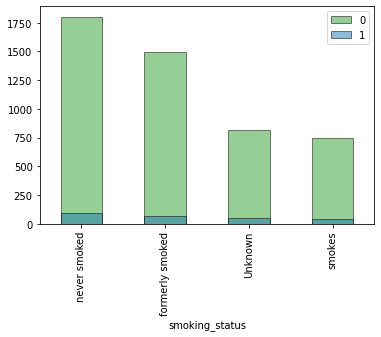

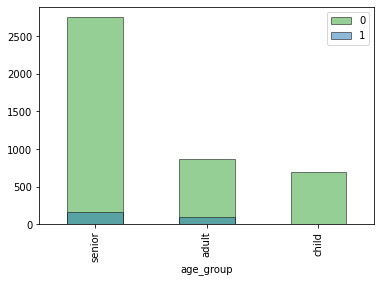

In [18]:
stroke_color = sns.color_palette()[0]
no_stroke_color = sns.color_palette()[2]

continuous_features = ['age', 'avg_glucose_level', 'bmi']

for column in df.columns:
    if column == 'stroke':
        continue
    plt.figure()
    if column in continuous_features:
        ax = plt.axes()
        for is_stroke, plot_color in zip([0, 1], [no_stroke_color, stroke_color]):
            s_data = df.loc[df['stroke']==is_stroke, column]
            s_data.plot.hist(alpha=0.5, ax=ax, color=plot_color, label=is_stroke, edgecolor='black')
    else:
        ax = plt.axes()
        for is_stroke, plot_color in zip([0, 1], [no_stroke_color, stroke_color]):
            s_data = df.loc[df['stroke']==is_stroke, column]
            s_data.value_counts().plot(kind='bar', alpha=0.5, ax=ax, color=plot_color, label=is_stroke, edgecolor='black')
            plt.xlabel(column)
    ax.legend()


Number of non-stroke vs stroke
Ratio of classes:  0.05123456790123457


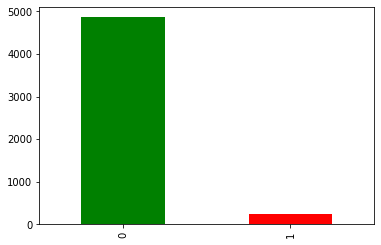

In [19]:
print('Number of non-stroke vs stroke')
df['stroke'].value_counts().plot.bar(color=['green', 'red'])
print('Ratio of classes: ', df['stroke'].value_counts().iloc[1]/df['stroke'].value_counts().iloc[0])

#### Calculate correlation matrix of numerical features.
Obtain maximum correlations.

In [20]:
corr_mat = df[continuous_features].corr()
for x in range(len(continuous_features)):
    corr_mat.iloc[x,x] = 0.0

corr_mat.abs().max()

age                  0.333143
avg_glucose_level    0.238323
bmi                  0.333143
dtype: float64

#### Examin skewness of numerical features
Skewness greater than 0.75 needs to be normalized via log.

In [21]:
skew_columns = df[continuous_features].skew().sort_values(ascending=False)
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

avg_glucose_level    1.572815
bmi                  1.065439
dtype: float64

#### Normalize skewed distribution
Log transform of skewed features.

In [22]:
for col in skew_columns.index.tolist():
    df[col] = np.log1p(df[col])

#### Scale feature values by min and max, so ranges are normalized to from 0 to 1.

In [23]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
for column in continuous_features:
    df[column] = mm.fit_transform(df[[column]])

round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
age,5109.0,0.527,0.276,0.0,0.304,0.548,0.744,1.0
hypertension,5109.0,0.097,0.297,0.0,0.000,0.000,0.000,1.0
heart_disease,5109.0,0.054,0.226,0.0,0.000,0.000,0.000,1.0
avg_glucose_level,5109.0,0.364,0.227,0.0,0.210,0.319,0.454,1.0
bmi,5109.0,0.434,0.116,0.0,0.361,0.440,0.506,1.0
stroke,5109.0,0.049,0.215,0.0,0.000,0.000,0.000,1.0


#### Visualize correlations between numerical data.

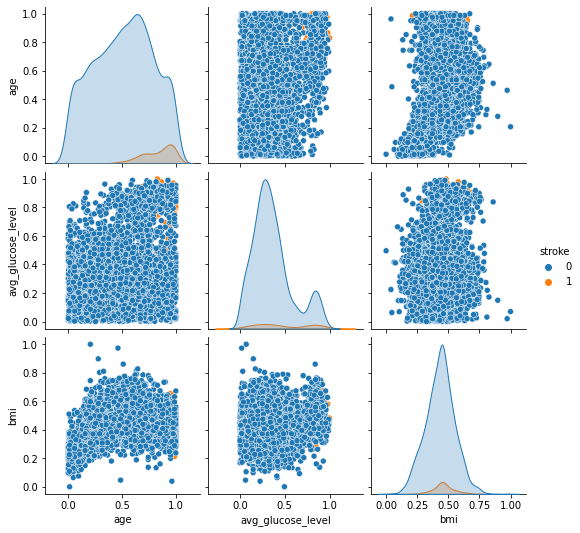

In [24]:
sns.pairplot(df[continuous_features + ['stroke']], hue='stroke');

### <ins>3. Clustering and dimension reduction models used to predict stroke</ins>,
1. KMeans
2. PCA (linear) + Logistic Regression
3. PCA (kernel) + Logistic Regression

* GridSearchCV is used for hyperparameter tunning of Logistic Regression model.
* confusion matrix to visualize prediction/truth grid.

In [25]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_auc_score

### KMeans
2 clusters - no stroke and stroke
Due to imbalanced classes, or unclusters, and large overlap between the age, bmi and glucose numerical features, Kmeans did not perform well and could not find a clear distinction between the 2 classes based on the numerical features.

In [26]:
# initialize, fit and predict
km = KMeans(n_clusters=2, random_state=12345)
km = km.fit(df[continuous_features])
df['kmeans'] = km.predict(df[continuous_features])

In [27]:
# group prediction results and compare to truth
df[['stroke', 'kmeans']].groupby(['kmeans', 'stroke']).size().to_frame().rename(columns={0: 'count'})

count
kmeans stroke       
0      0        2544
       1         239
1      0        2316
       1          10

### PCA Linear
Dimension reduction to reduce features and then apply logistic regression.
* First, perform feature engineering to add converted categorical features to nominal ones.
* Second, split into trainng and testing datasets.
* Third, Over and Undersample to get balanced dataset.
* Fourth, apply PCA to reduce dimensions
* Lastly, apply logistic regression.

#### Feature engineering: categorical features
Convert categorical features (gender, ever_married, smoking_status, age_group, work_type, residence_type) to nominal.


In [28]:
# collect list of categorical features
categorical_features = list()
for column in df.columns:
    if df[column].dtypes == 'object':
        categorical_features.append(column)

# remove age_group created
categorical_features.remove('age_group')

# convert categorical features to nomial
df_feat_eng = pd.get_dummies(df[categorical_features], drop_first=True)

# concat to existing numerical features
df_featured = pd.concat([df, df_feat_eng], axis=1)

# drop duplicate features
df_featured = df_featured.drop(['age_group', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1, errors='ignore')

#### Split first into training and testing datasets
confirm class ratios for y_train and y_test with whole dataset.

y_train
Number of non-stroke vs stroke
Ratio of classes:  0.051183127572016464


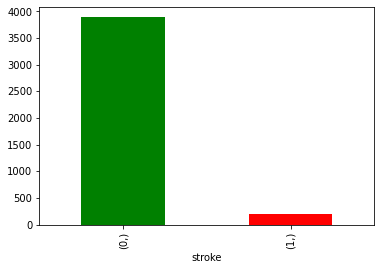

In [29]:
from sklearn.model_selection import train_test_split

X = df_featured.loc[ : , df_featured.columns != 'stroke']
y = df_featured['stroke'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 12345)

print('y_train')
print('Number of non-stroke vs stroke')
y_train.to_frame().value_counts().plot.bar(color=['green', 'red'])
print('Ratio of classes: ', y_train.to_frame().value_counts().iloc[1]/y_train.to_frame().value_counts().iloc[0])

y_test
Number of non-stroke vs stroke
Ratio of classes:  0.051440329218107


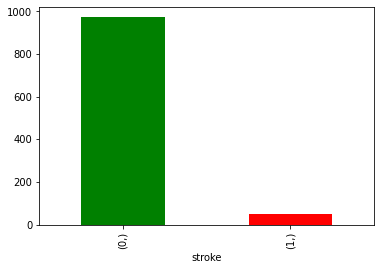

In [30]:
print('y_test')
print('Number of non-stroke vs stroke')
y_test.to_frame().value_counts().plot.bar(color=['green', 'red'])
print('Ratio of classes: ', y_test.to_frame().value_counts().iloc[1]/y_test.to_frame().value_counts().iloc[0])

#### Synthetic Minority Oversampling Technique (SMOTE)
SMOTE first creates many pairs or small clusters with two or more similar instances, the measure by instance distance such as Euclidean distance.
Then, within the boundary of each pair or cluster, SMOTE uniformly permutes features value, one feature at a time, to populate a collection of similar synthesized instances within each pair or cluster.
As a result, SMOTE creates a class-balanced synthetic dataset without adding duplicated instances with minority labels.

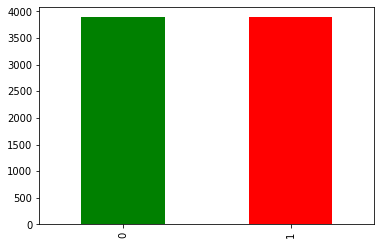

In [31]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote_sampler = SMOTE(random_state = 12345)
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
y_smo.value_counts().plot.bar(color=['green', 'red']);

#### Oversampling of the minority class to build up to the class size similar to that of majority

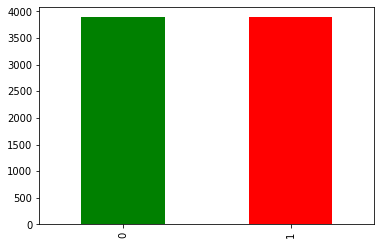

In [32]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)
y_over.value_counts().plot.bar(color=['green', 'red']);

#### Undersampling of majority class to reduce class size to similar to that of minority

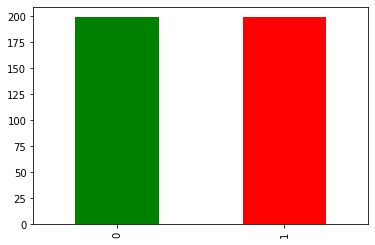

In [33]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)
y_under.value_counts().plot.bar(color=['green', 'red']);

#### Apply Linear PCA
Linear kernal to 4 components.

In [34]:
print('Number of features: ', X_under.shape[1])
pca = PCA(n_components=4)
X_under_pca = pca.fit_transform(X_under)
print('Reduced number of features: ', X_under_pca.shape[1])
X_test_pca = pca.transform(X_test)

Number of features:  16
Reduced number of features:  4


#### Logistic Regression

confusion matrix and classification report to visualize and tabulation model performance.

{'C': 1, 'max_iter': 100}


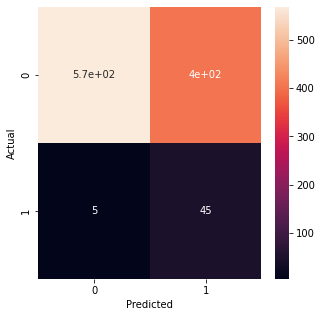

In [35]:
# fit to logistic regression model
param_grid = {'C':[0.001,0.01, 0.1,1, 10], 
            'max_iter':[100, 500,1000]}

log = GridSearchCV(LogisticRegression(solver='lbfgs'),
                         param_grid,
                         cv=5)
log.fit(X_under_pca,y_under)
print(log.best_params_)

# predict from X_test (which is imbalanced)
y_pred_log = log.predict(X_test_pca)
confusion_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5, 5));
sns.heatmap(confusion_log, annot=True);
plt.xlabel("Predicted");
plt.ylabel("Actual");

In [36]:
scores = list()

accuracy = accuracy_score(y_test, y_pred_log)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_pred_log, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred_log)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

scores.append(('Linear PCA + Logistic Regression', accuracy, precision, recall, fbeta, auc))

Accuracy is: 0.60
Precision is: 0.10
Recall is: 0.90
Fscore is: 0.69
AUC is: 0.74


### Apply RBF PCA
RBF kernal to 4 components.

In [37]:
print('Number of features: ', X_under.shape[1])
kernal_pca = KernelPCA(kernel="rbf", 
                 fit_inverse_transform=True,
                 gamma=10,
                n_components=4)
X_under_kernal_pca = kernal_pca.fit_transform(X_under)
print('Reduced number of features: ', X_under_kernal_pca.shape[1])
X_test_kernal_pca = pca.transform(X_test)

Number of features:  16
Reduced number of features:  4


{'C': 1, 'max_iter': 100}


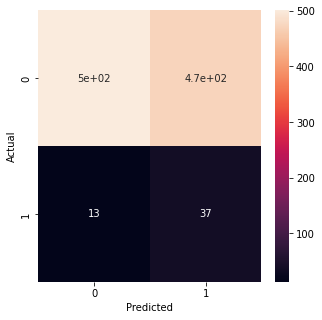

In [38]:
# fit to logistic regression model
param_grid = {'C':[0.001,0.1, 1,10, 100], 
            'max_iter':[100, 500,1000]}

log = GridSearchCV(LogisticRegression(solver='lbfgs'),
                         param_grid,
                         cv=5)
log.fit(X_under_kernal_pca,y_under)
print(log.best_params_)

# predict from X_test (which is imbalanced)
y_pred_log = log.predict(X_test_kernal_pca)
confusion_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5, 5));
sns.heatmap(confusion_log, annot=True);
plt.xlabel("Predicted");
plt.ylabel("Actual");

In [39]:
accuracy = accuracy_score(y_test, y_pred_log)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_pred_log, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred_log)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

scores.append(('RBF PCA + Logistic Regression', accuracy, precision, recall, fbeta, auc))

Accuracy is: 0.53
Precision is: 0.07
Recall is: 0.74
Fscore is: 0.55
AUC is: 0.63


### <ins>Best model selection</ins>

Of the 3 models, Kmeans, linear PCA + logistic regression, and RBF PCA + logistic regression, the latter performed the best with slightly higher accuracy, precision, fscore and AUC. Since the test dataset is as imbalanced as the training dataset, the precision is quite low, which lowered the F-score. But the AUC and F-score are somewhat less sensitive to imbalanced dataset than precision and recall, and are better metrics for imbalanced datasets.

In [40]:
df_scores = pd.DataFrame(scores, columns=['model', 'accuracy', 'precision', 'recall', 'fscore', 'AUC'])
df_scores = df_scores.set_index('model')
df_scores

,accuracy,precision,recall,fscore,AUC
model,,,,,
Linear PCA + Logistic Regression,0.599804,0.100223,0.90,0.688640,0.742181
RBF PCA + Logistic Regression,0.526419,0.072835,0.74,0.547213,0.627716


### <ins>4. Key Findings</ins>

Kmeans clustering to the 2 classes, no stroke and stroke, using the numerical features, age, bmi and glucose, performed very poorly due to the highly imbalanced classes i.e. uneven clusters and too few relevant numerical features of importance to stroke.

PCA was used to reduce the number of features from 16 to 4 using both linear and RBF kernels. Each was then fitted to logistic regression model for stroke prediction. Both performed similarly well with the RBF PCA edging out the linear PCA.

### <ins>5. Flaws and improvements</ins>
Stroke is a complex medical condition with a lot of other factors that may account for it beyond the ones explored in this dataset, namely age, gender, bmi, hypertension, smoking, etc.
There are also other more apparent factors like occupation, pre-existing conditions, genetic predispositions, etc., which should be included to improve the prediction accuracies.

Further improvements can be with the use other classification models that uses boosting such as Gradient Boosted Classifier and AdaBoost. Hyperparameter tunning of number of components in PCA can also be explored.